# TASK - 01

To Predict the percentage of marks of the students based on the number of hours they studied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [7]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that there are no missing values!

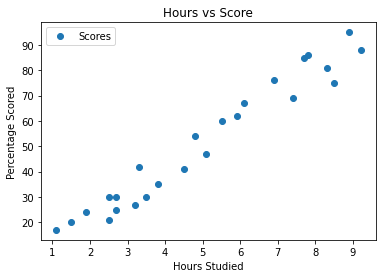

In [9]:
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Score')
plt.show()

From this plot , it is clear that there is an approximate straight line(Linear) relation between Percentage Scored and Hpurs studied

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can see that both the variables are positively correlated

Now, we split dependent(X) and independent(y) variables

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [17]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [18]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

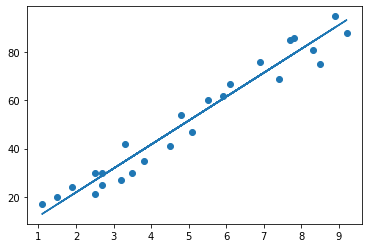

In [27]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


Predicting the Percentage of Marks:

In [28]:
y_pred = regressor.predict(X_test)

In [43]:
print(y_pred)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [44]:
df = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})  

In [45]:
print(df)

   Actual Marks  Predicted Marks
0            20        16.844722
1            27        33.745575
2            69        75.500624
3            30        26.786400
4            62        60.588106
5            35        39.710582
6            24        20.821393


In [46]:
from sklearn.metrics import mean_absolute_error

In [47]:
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.130879918502486


What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [49]:
hours = [9.25]
print(regressor.predict([hours]))

[93.89272889]


The student is likely to score 93.89(approx. 94) marks , if he/she studies for 9.25 hrs